In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from numpy import random
import pandas as pd
# from pandas import Series
from IPython.display import Image, HTML, display

In [2]:
# Read the csv file into a pandas DataFrame

wine_data = pd.read_csv('./Data/wine.csv')
wine_data.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
# Assign the data to X and y

X = wine_data[["pH", "alcohol"]]
y = wine_data["high_quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6497, 2) (6497, 1)


In [4]:
#from sklearn.datasets import make_regression

#X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [6]:
model.fit(X, y)
print(model)

LinearRegression()


In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.08826821  0.16094172]]
y-axis intercept:  [-0.77141577]


In [8]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0]
Predicted output: [0.431615]
Prediction Error: [0.431615]


In [9]:
#pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [12]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1628865829581838
Testing Score: 0.1369967205654794


Text(0.5, 1.0, 'Residual Plot')

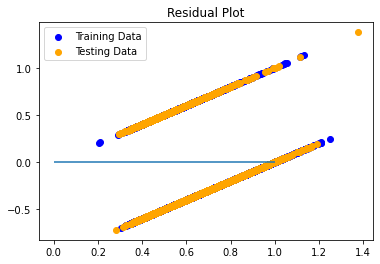

In [13]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [14]:
X

,pH,alcohol
0,3.51,9.4
1,3.20,9.8
2,3.26,9.8
3,3.16,9.8
4,3.51,9.4
...,...,...
6492,3.27,11.2
6493,3.15,9.6
6494,2.99,9.4
6495,3.34,12.8


In [15]:
data_binary_encoded = pd.get_dummies(X)
data_binary_encoded.head()

,pH,alcohol
0,3.51,9.4
1,3.20,9.8
2,3.26,9.8
3,3.16,9.8
4,3.51,9.4


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(iris.data, iris.target)
rf.score(iris.data, iris.target)

NameError: name 'iris' is not defined